# Érdekességek a matematika alkalmazásaiból

## Klasszifikáció kiértékelése

*Gyarmathy Zsófia & Varasdi Károly*

### Jupyter notebook és Python környezet felállítás, csomagimportok

In [1]:
## Megjelenítéshez a notebookban:
from IPython.core.display import Image, display #használat: display(Image(filename='image.png'))
from tabulate import tabulate

In [2]:
## Adatmanipulációhoz
import os
import zipfile
import pandas as pd
import numpy as np
import random

In [3]:
### Gépi tanuláshoz
## előfeldolgozás
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## klasszifikáció
from sklearn.neighbors import KNeighborsClassifier
'''
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)
knn_classifier.fit(X_train, y_train)
'''
from sklearn.naive_bayes import GaussianNB

## klaszterezés
from sklearn.cluster import DBSCAN, KMeans

## kiértékelés
from sklearn.metrics import confusion_matrix
'''
osszekeveresi_matrix = confusion_matrix(actual, predicted)
tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
'''

from sklearn.metrics import classification_report 
'''klasszifikacios_kiertekeles = classification_report(actual, predicted)'''
from sklearn.metrics import accuracy_score 
'''acc = accuracy_score(actual, predicted)'''
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from collections import Counter

In [4]:
## randomizációs seed (reprodukálhatósághoz)
rseed = 10

### Összekeverési mátrix (confusion matrix)

Kezdetnek tekintsük a bináris kategorizáció esetét.

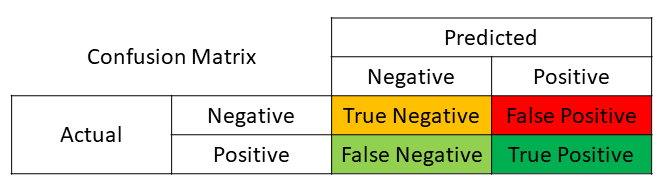

Forrás: https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019


In [5]:
display(Image('abrak/confmatrix.png', width=600))
print("Forrás: https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019")

* **TP (true positives, valódi pozitı́vok)**: azon adatpontok száma, amelyeket a rendszer helyesen pozitívnak ítélt.
* **TN (true negatives, valódi negatívok)**: azon adatpontok száma, amelyeket a rendszer helyesen negatívnak ítélt.
* **FP (false positives, téves pozitı́vok)** (= 1. típusú hiba): azon adatpontok száma, amelyeket a rendszer tévesen pozitívnak ítélt.
* **FN (false negatives, téves negatı́vok)** (= 2. típusú hiba): azon adatpontok száma, amelyeket a rendszer tévesen negatívnak ítélt.


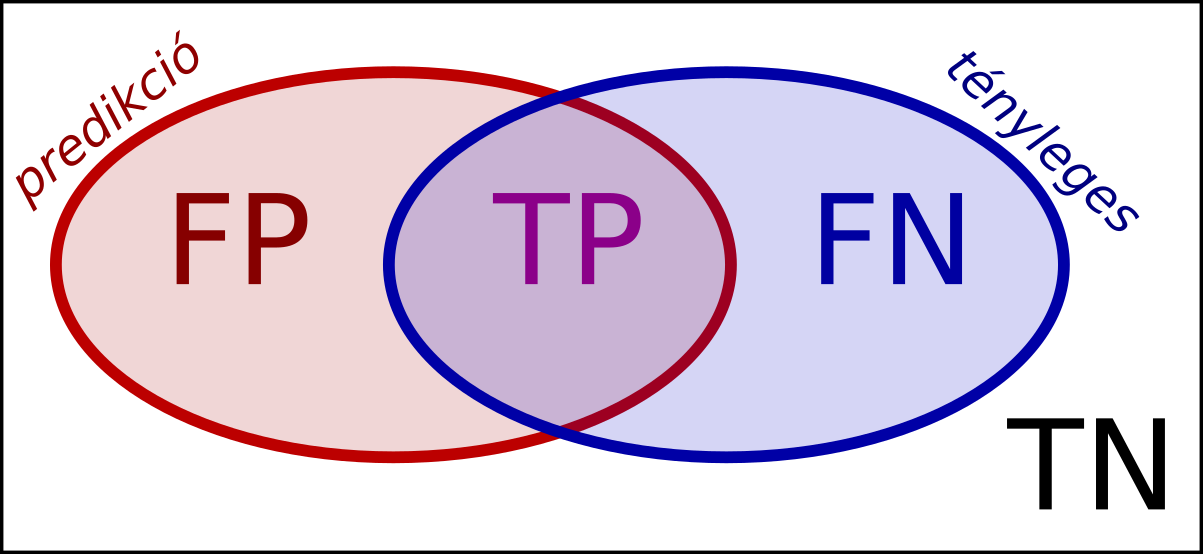

In [6]:
display(Image('abrak/TF-PN-Venn.png', width=400))

#### Mérőszámok

##### Korrektség (accuracy, AC)
Az *accuracy* azt méri, hogy az összes esetből hányban történt a klasszifikáció a helyes módon:

$$\mathsf{accuracy} = \frac{TP + TN}{P + N} = \frac{TP + TN}{TP + TN + FP + FN}$$

In [7]:
predikcio = [1, 0, 0, 0, 1, 1, 1]
tenyleges = [1, 1, 0, 0, 1, 0, 1]
eltalalta = [predikcio[i] == tenyleges[i] for i in range(len(predikcio))]

print("predikció:", predikcio)
print("tényleges:", tenyleges)
print("eltalálta:", eltalalta)

predikció: [1, 0, 0, 0, 1, 1, 1]
tényleges: [1, 1, 0, 0, 1, 0, 1]
eltalálta: [True, False, True, True, True, False, True]


In [8]:
osszekeveresi_matrix = confusion_matrix(tenyleges, predikcio)
tn, fp, fn, tp = osszekeveresi_matrix.ravel()
print("Confusion matrix:")
print("   0", "1")
print("   ---")
i = 0
for row in osszekeveresi_matrix:
    print(str(i) + ":", row[0], row[1])
    i += 1

Confusion matrix:
   0 1
   ---
0: 2 1
1: 1 3


Mennyi az accuracy?

In [9]:
acc_manual = eltalalta.count(True) / len(eltalalta)
acc_manual

0.7142857142857143

In [10]:
accuracy_score(tenyleges, predikcio)

0.7142857142857143

**Elég az accuracy a kiértékeléshez?**

In [11]:
beteg = np.zeros(100000)
beteg[99000:] = 1

In [12]:
print("Egészségesek száma:", (beteg == 0).sum())
print("Betegek száma:", (beteg == 1).sum())

Egészségesek száma: 99000
Betegek száma: 1000


In [13]:
## változtassuk meg az értékek 1%-át egy "minta predikcióként"
random.seed(rseed)
i_valtoztatni = random.sample(list(range(len(beteg))), int(len(beteg)/100))
predikcio = np.array([beteg[i] if (i not in i_valtoztatni) else 1-beteg[i] for i in range(len(beteg))])

In [14]:
print("Predikció szerint betegek száma:", (predikcio == 1).sum())

Predikció szerint betegek száma: 1984


In [15]:
accuracy_score(beteg, predikcio)

0.99

**Az adatpontok 99%-ában helyes eredményt ad a modell.** Elégedettek vagyunk-e?

In [16]:
osszekeveresi_matrix = confusion_matrix(beteg, predikcio)
tn, fp, fn, tp = osszekeveresi_matrix.ravel()
print("Confusion matrix a betegség modellre:")
print(tabulate([['0:'] + list(osszekeveresi_matrix[0]), ['1:'] + list(osszekeveresi_matrix[1])], \
                headers=['0', '1']))

Confusion matrix a betegség modellre:
        0    1
--  -----  ---
0:  98008  992
1:      8  992


##### Pontosság (precison)
A *precision* azt mutatja meg, hogy a rendszer által *helyesen* pozitívnak vélt adatpontok mekkora hányadát alkotják a rendszer által pozitı́vnak vélt adatpontok számosságának.

$$\textsf{precision} = \frac{TP}{TP + FP}$$


In [17]:
print("Pontosság betegség példában:", precision_score(beteg, predikcio))

Pontosság betegség példában: 0.5


##### Felidézés (recall, sensitivity, true positive rate, TPR) 

A *recall* az az arány, ami azt mutatja, hogy az összes ténylegesen pozitívnak kategorizálandó adatpont mekkora részét osztályozta a rendszer helyesen pozitı́vnak.

$$\textsf{recall} = \frac{TP}{P} = \frac{TP}{TP + FN}$$


In [18]:
print("Felidézés betegség példában:", recall_score(beteg, predikcio))

Felidézés betegség példában: 0.992


##### F-mérték (F1-score, F-score, F-measure)
Az F-mérték egy egységes kombinált érték, a pontosság és a felidézés harmonikus közepe:

$$\mathit{F1} = \frac{2}{ \frac{1}{\textsf{precision}} + \frac{1}{\textsf{recall}} } =
2 * \frac{(\textsf{precision} * \textsf{recall})}{(\textsf{precision} + \textsf{recall})}$$

In [19]:
print("F1 (precision--recall harmonikus közép) betegség példában:", f1_score(beteg, predikcio))

F1 (precision--recall harmonikus közép) betegség példában: 0.6648793565683646


In [20]:
print("Betegség példabeli precision és recall számtani közepe:", \
      np.mean([precision_score(beteg, predikcio), recall_score(beteg, predikcio)]))

Betegség példabeli precision és recall számtani közepe: 0.746


##### További gyakori mértékek

**Hamis pozitı́vok aránya (false positive rate, FPR):** 
A FPR az az arány, amely megmutatja, hogy a rendszer a valójában negatívnak kategorizálandó adatpontok mekkora részét osztályozta hibásan pozitívnak.

$$\mathit{FPR} = \frac{FP}{N} = \frac{FP}{TN + FP}$$


**Valódi negatı́vok aránya (specificity, true negative rate, TNR):**
A TNR a TPR érték "duálisa": azt mutatja, hogy azon adatpontok száma, amiket a rendszer helyes negatívnak
ítélt, hogy aránylik a ténylegesen negatívak számához.

$$\mathit{TNR} = \frac{TN}{N} = \frac{TN}{TN + FP}$$


**Téves negatívok aránya (false negative rate, FNR):** 
A FNR az FPR érték "duálisa": megmutatja, hogy azon adatpontok száma, amiket a rendszer tévesen negatívnak ítélt hogy aránylik a ténylegesen pozitívak számához.

$$\mathit{FNR} = \frac{FN}{P} = \frac{FN}{TP + FN}$$


### Példa: időjárási adatok

In [21]:
adatzipfile = r"adatok/BP_d_1960-2010.zip"
adatfile = "BP_d_1960-2010.csv"
adatfilepath = os.path.join("adatok/", os.path.basename(adatfile))
with zipfile.ZipFile(adatzipfile) as z:
    with open(adatfilepath, 'wb') as f:
        f.write(z.read(adatfile))

In [22]:
bpido = pd.read_csv(adatfilepath,sep=";")
bpido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18628 entries, 0 to 18627
Data columns (total 7 columns):
#datum    18628 non-null object
d_ta      18628 non-null float64
d_tx      18628 non-null float64
d_tn      18628 non-null float64
d_rs      8807 non-null float64
d_rf      8924 non-null float64
d_ss      18628 non-null float64
dtypes: float64(6), object(1)
memory usage: 1018.8+ KB


In [23]:
with open(r"adatok/BP_d_leiras.txt")  as f:
    adatleiras = f.read()
    
print("Az adatok leírása:\n")

print(adatleiras)

Az adatok leírása:

Forrás:
https://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/Budapest/adatok/napi_adatok/index.php

Letöltve: 2019.03.28.

Oszlopok:
d_ta	napi középhőmérséklet [°C]
d_tx	napi maximumhőmérséklet [°C]
d_tn	napi minimumhőmérséklet [°C]
d_rs	napi csapadékösszeg [mm]
d_rf	napi csapadékösszeg fajtája
d_ss	napfénytartam napi összege [óra]


d_rf értékek
0	ködszitálás, szitálás
1	eső
2	ónos eső, ónos szitálás
3	záporeső
4	hó, havaseső
5	hózápor, darazápor
6	jégeső, jégdara
7	zivatar (lehet csapadék nélkül is)
8	hózivatar
9	zivatar jégesővel



In [24]:
bpido.head()

,#datum,d_ta,d_tx,d_tn,d_rs,d_rf,d_ss
0,1960-01-01,2.4,5.1,-0.4,0.1,1.0,2.3
1,1960-01-02,2.3,3.1,1.4,3.1,1.0,0.0
2,1960-01-03,2.7,5.3,1.7,NaN,NaN,0.6
3,1960-01-04,2.0,4.4,0.4,0.0,0.0,0.0
4,1960-01-05,2.5,5.3,1.1,NaN,NaN,0.0


Dátumok dátumként kezelése, év és hónap kinyerése:

In [25]:
bpido['#datum'] = pd.to_datetime(bpido['#datum'])
bpido['year'] = bpido['#datum'].dt.year
bpido['month'] = bpido['#datum'].dt.month

In [26]:
bpido.sample(3)

,#datum,d_ta,d_tx,d_tn,d_rs,d_rf,d_ss,year,month
9335,1985-07-23,22.6,28.5,17.0,NaN,NaN,11.2,1985,7
12695,1994-10-04,13.8,21.4,8.9,0.0,1.0,3.5,1994,10
15552,2002-07-31,24.1,29.3,20.9,7.4,3.0,9.4,2002,7


#### Klasszifikáció: csapadéktípus hőmérsékletek, év, hónap alapján

In [27]:
adatok = bpido.loc[:, ["d_ta", "d_tx", "d_tn", "year", "month", "d_rf"]]
adatok.head()

,d_ta,d_tx,d_tn,year,month,d_rf
0,2.4,5.1,-0.4,1960,1,1.0
1,2.3,3.1,1.4,1960,1,1.0
2,2.7,5.3,1.7,1960,1,NaN
3,2.0,4.4,0.4,1960,1,0.0
4,2.5,5.3,1.1,1960,1,NaN


Ellenőrizzük, vannak-e a bemeneti adatokban (nem csapadéktípus) hiányzó értékek:

In [28]:
adatok[adatok.iloc[:, 0:5].isna().any(1)]

,d_ta,d_tx,d_tn,year,month,d_rf


Csak csapadéktípusban van NaN, azokat helyettesítsük -1-gyel:

In [29]:
adatok.fillna(-1, inplace=True)

Bemeneti és kimeneti (csapadéktípus) változók létrehozása:

In [30]:
X = adatok.iloc[:, 0:5].values
y = adatok.iloc[:, -1].values

In [31]:
print("Bemenet alakja:", np.shape(X))
print("Kimenet alakja:", np.shape(y))

Bemenet alakja: (18628, 5)
Kimenet alakja: (18628,)


Bemeneti változóértékek normalizálása:

In [32]:
X = StandardScaler().fit_transform(X)

Tanító és tesztadatok:

In [33]:
print("Randomizációhoz seed értéke:", rseed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rseed)
print("Tanítóadatok száma:", np.shape(y_train)[0])
print("Tesztadatok száma:", np.shape(y_test)[0])

Randomizációhoz seed értéke: 10
Tanítóadatok száma: 14902
Tesztadatok száma: 3726


##### KNN klasszifikáció

In [34]:
knn = KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

A klasszifikátor predikciója a tesztadatokra:

In [35]:
y_pred = knn.predict(X_test)

In [36]:
knn_kiertekeles = classification_report(y_test, y_pred)
print(knn_kiertekeles)

              precision    recall  f1-score   support

        -1.0       0.57      0.91      0.70      1896
         0.0       0.00      0.00      0.00        67
         1.0       0.52      0.31      0.39       818
         2.0       0.00      0.00      0.00        16
         3.0       0.40      0.06      0.10       374
         4.0       0.54      0.27      0.36       262
         5.0       0.00      0.00      0.00        25
         6.0       0.00      0.00      0.00        19
         7.0       0.28      0.05      0.08       236
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00        12

   micro avg       0.56      0.56      0.56      3726
   macro avg       0.21      0.14      0.15      3726
weighted avg       0.50      0.56      0.48      3726



/home/chell/anaconda3/envs/mlearn/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Egy naiv Bayes klasszifikáció (nem távolság alapú)

In [37]:
naivb = GaussianNB()
naivb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
y_pred_NB = naivb.predict(X_test)
print(classification_report(y_test, y_pred_NB))


              precision    recall  f1-score   support

        -1.0       0.54      0.31      0.40      1896
         0.0       0.00      0.00      0.00        67
         1.0       0.40      0.31      0.35       818
         2.0       0.08      0.12      0.10        16
         3.0       0.11      0.00      0.01       374
         4.0       0.31      0.88      0.46       262
         5.0       0.00      0.00      0.00        25
         6.0       0.00      0.00      0.00        19
         7.0       0.17      0.84      0.28       236
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00        12

   micro avg       0.34      0.34      0.34      3726
   macro avg       0.15      0.22      0.14      3726
weighted avg       0.40      0.34      0.33      3726



/home/chell/anaconda3/envs/mlearn/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Klaszterezés

In [39]:
adatok2 = bpido.loc[:, [c for c in bpido.columns if c not in ["#datum", "year", "month"]]]
adatok2["d_rs"].fillna(0, inplace=True)
adatok2 = pd.concat([adatok2, pd.get_dummies(adatok2["d_rf"], dummy_na=True, prefix="d_rf")], axis=1)
del adatok2['d_rf']
adatok2.head()

,d_ta,d_tx,d_tn,d_rs,d_ss,d_rf_0.0,d_rf_1.0,d_rf_2.0,d_rf_3.0,d_rf_4.0,d_rf_5.0,d_rf_6.0,d_rf_7.0,d_rf_8.0,d_rf_9.0,d_rf_nan
0,2.4,5.1,-0.4,0.1,2.3,0,1,0,0,0,0,0,0,0,0,0
1,2.3,3.1,1.4,3.1,0.0,0,1,0,0,0,0,0,0,0,0,0
2,2.7,5.3,1.7,0.0,0.6,0,0,0,0,0,0,0,0,0,0,1
3,2.0,4.4,0.4,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0
4,2.5,5.3,1.1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1


Bemeneti változóértékek normalizálása:

In [40]:
X2 = adatok2.values
X2 = StandardScaler().fit_transform(X2)

##### DBSCAN

A trénelés eltarthat egy ideig!

In [41]:
dbscan = DBSCAN(metric='euclidean') #eps és min_samples még a két legfontosabb megadható paraméter 
dbscan.fit(X2)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [42]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cores_ = len(dbscan.core_sample_indices_)
n_noise_ = list(labels).count(-1)
n_other = len(X2) - n_cores_ - n_noise_

print('Klaszterek száma (noise nélkül): %d' % n_clusters_)
print('\nPontok száma összesen: %d\n' % len(labels))
print('Core pontok száma %d' % n_cores_)
print('Zajpontok száma: %d' % n_noise_)
print('Nem core, de clusterezett pontok száma: %d' % n_other)

Klaszterek száma (noise nélkül): 16

Pontok száma összesen: 18628

Core pontok száma 17735
Zajpontok száma: 614
Nem core, de clusterezett pontok száma: 279


##### KMeans

In [43]:
kmeans = KMeans(n_clusters=16, random_state=rseed).fit(X2)

In [45]:
km_counter = Counter(kmeans.labels_)
db_counter = Counter(dbscan.labels_)

In [46]:
km_counter.most_common()

[(9, 3707),
 (0, 3151),
 (12, 2847),
 (13, 2178),
 (1, 1546),
 (2, 1284),
 (3, 1152),
 (15, 1086),
 (4, 719),
 (6, 315),
 (14, 276),
 (5, 132),
 (10, 94),
 (7, 81),
 (8, 56),
 (11, 4)]

In [47]:
db_counter.most_common()

[(1, 9698),
 (0, 3739),
 (5, 1735),
 (3, 1244),
 (7, 1071),
 (-1, 614),
 (2, 294),
 (4, 111),
 (8, 64),
 (12, 14),
 (15, 8),
 (14, 7),
 (13, 7),
 (9, 6),
 (10, 6),
 (11, 6),
 (6, 4)]